## Imports

In [1]:
import os
import shutil
from pathlib import Path
import pandas as pd
import dataframe_image as dfi
import numpy as np

from src.database import *
import matplotlib.pyplot as plt
plt.style.use('custom_matplotlibrc')
plt.rcParams["figure.figsize"] = (20,5)
fig_id = 0

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 1)


## Configurations

In [2]:
database_path = Path('databases/3T_NIST_T1maps_database.pkl')
remove_outliers = False

## Load database

In [3]:
df = pd.read_pickle(database_path)

## Prepare stats table

In [4]:
columns = [
    '1',
    '2',
    '3',
    '4',
    '5',
    '6',
    '7',
    '8',
    '9',
    '10',
    '11',
    '12',
    '13',
    '14'
]

col_vals = [
    None,
    None,
    None,
    None,
    None,
    None,
    None,
    None,
    None,
    None,
    None,
    None,
    None,
    None
]

df_setup = {
    'all submissions mean T1': col_vals,
    'inter-submission mean T1': col_vals,
    'intra-submission mean T1': col_vals,
    'all submissions T1 STD': col_vals,
    'inter-submission T1 STD': col_vals,
    'intra-submission T1 STD': col_vals,
    'all submissions COV [%]': col_vals,
    'inter-submission COV [%]': col_vals,
    'intra-submission COV [%]': col_vals
}

stats_table = pd.DataFrame.from_dict(df_setup, orient='index', columns=columns)

## All submissions (phantom version 2)

In [5]:
estimate_1 = np.array([])
estimate_2 = np.array([])
estimate_3 = np.array([])
estimate_4 = np.array([])
estimate_5 = np.array([])
estimate_6 = np.array([])
estimate_7 = np.array([])
estimate_8 = np.array([])
estimate_9 = np.array([])
estimate_10 = np.array([])
estimate_11 = np.array([])
estimate_12 = np.array([])
estimate_13 = np.array([])
estimate_14 = np.array([])


ii = 0
for index, row in df.iterrows():
    if index == 13.001: # missing data
        break
    if remove_outliers and (index == 12.001 or index == 2.001):
            pass
    else:
        if df.loc[index]['phantom serial number'] is None:
            df.at[index, 'phantom serial number'] = 999  # Missing phantom number was version 2, see discussion here https://github.com/rrsg2020/data_submission/issues/25#issuecomment-620045155
        if df.loc[index]['phantom serial number']<42: # version 1
            pass
        else:
            estimate_1 = np.append(estimate_1, np.mean(df.loc[index]['T1 - NIST sphere 1']))
            estimate_2 = np.append(estimate_2, np.mean(df.loc[index]['T1 - NIST sphere 2']))
            estimate_3 = np.append(estimate_3, np.mean(df.loc[index]['T1 - NIST sphere 3']))
            estimate_4 = np.append(estimate_4, np.mean(df.loc[index]['T1 - NIST sphere 4']))
            estimate_5 = np.append(estimate_5, np.mean(df.loc[index]['T1 - NIST sphere 5']))
            estimate_6 = np.append(estimate_6, np.mean(df.loc[index]['T1 - NIST sphere 6']))
            estimate_7 = np.append(estimate_7, np.mean(df.loc[index]['T1 - NIST sphere 7']))
            estimate_8 = np.append(estimate_8, np.mean(df.loc[index]['T1 - NIST sphere 8']))
            estimate_9 = np.append(estimate_9, np.mean(df.loc[index]['T1 - NIST sphere 9']))
            estimate_10 = np.append(estimate_10, np.mean(df.loc[index]['T1 - NIST sphere 10']))
            estimate_11 = np.append(estimate_11, np.mean(df.loc[index]['T1 - NIST sphere 11']))
            estimate_12 = np.append(estimate_12, np.mean(df.loc[index]['T1 - NIST sphere 12']))
            estimate_13 = np.append(estimate_13, np.mean(df.loc[index]['T1 - NIST sphere 13']))
            estimate_14 = np.append(estimate_14, np.mean(df.loc[index]['T1 - NIST sphere 14']))

        ii = ii +1

In [6]:
stats_table['1']['all submissions mean T1'] = np.nanmean(estimate_1)
stats_table['1']['all submissions T1 STD'] = np.nanstd(estimate_1)
stats_table['1']['all submissions COV [%]'] = np.divide(np.nanstd(estimate_1),np.nanmean(estimate_1)) * 100

stats_table['2']['all submissions mean T1'] = np.nanmean(estimate_2)
stats_table['2']['all submissions T1 STD'] = np.nanstd(estimate_2)
stats_table['2']['all submissions COV [%]'] = np.divide(np.nanstd(estimate_2),np.nanmean(estimate_2)) * 100

stats_table['3']['all submissions mean T1'] = np.nanmean(estimate_3)
stats_table['3']['all submissions T1 STD'] = np.nanstd(estimate_3)
stats_table['3']['all submissions COV [%]'] = np.divide(np.nanstd(estimate_3),np.nanmean(estimate_3)) * 100

stats_table['4']['all submissions mean T1'] = np.nanmean(estimate_4)
stats_table['4']['all submissions T1 STD'] = np.nanstd(estimate_4)
stats_table['4']['all submissions COV [%]'] = np.divide(np.nanstd(estimate_4),np.nanmean(estimate_4)) * 100

stats_table['5']['all submissions mean T1'] = np.nanmean(estimate_5)
stats_table['5']['all submissions T1 STD'] = np.nanstd(estimate_5)
stats_table['5']['all submissions COV [%]'] = np.divide(np.nanstd(estimate_5),np.nanmean(estimate_5)) * 100

stats_table['6']['all submissions mean T1'] = np.nanmean(estimate_6)
stats_table['6']['all submissions T1 STD'] = np.nanstd(estimate_6)
stats_table['6']['all submissions COV [%]'] = np.divide(np.nanstd(estimate_6),np.nanmean(estimate_6)) * 100

stats_table['7']['all submissions mean T1'] = np.nanmean(estimate_7)
stats_table['7']['all submissions T1 STD'] = np.nanstd(estimate_7)
stats_table['7']['all submissions COV [%]'] = np.divide(np.nanstd(estimate_7),np.nanmean(estimate_7)) * 100

stats_table['8']['all submissions mean T1'] = np.nanmean(estimate_8)
stats_table['8']['all submissions T1 STD'] = np.nanstd(estimate_8)
stats_table['8']['all submissions COV [%]'] = np.divide(np.nanstd(estimate_8),np.nanmean(estimate_8)) * 100

stats_table['9']['all submissions mean T1'] = np.nanmean(estimate_9)
stats_table['9']['all submissions T1 STD'] = np.nanstd(estimate_9)
stats_table['9']['all submissions COV [%]'] = np.divide(np.nanstd(estimate_9),np.nanmean(estimate_9)) * 100

stats_table['10']['all submissions mean T1'] = np.nanmean(estimate_10)
stats_table['10']['all submissions T1 STD'] = np.nanstd(estimate_10)
stats_table['10']['all submissions COV [%]'] = np.divide(np.nanstd(estimate_10),np.nanmean(estimate_10)) * 100

stats_table['11']['all submissions mean T1'] = np.nanmean(estimate_11)
stats_table['11']['all submissions T1 STD'] = np.nanstd(estimate_11)
stats_table['11']['all submissions COV [%]'] = np.divide(np.nanstd(estimate_11),np.nanmean(estimate_11)) * 100

stats_table['12']['all submissions mean T1'] = np.nanmean(estimate_12)
stats_table['12']['all submissions T1 STD'] = np.nanstd(estimate_12)
stats_table['12']['all submissions COV [%]'] = np.divide(np.nanstd(estimate_12),np.nanmean(estimate_12)) * 100

stats_table['13']['all submissions mean T1'] = np.nanmean(estimate_13)
stats_table['13']['all submissions T1 STD'] = np.nanstd(estimate_13)
stats_table['13']['all submissions COV [%]'] = np.divide(np.nanstd(estimate_13),np.nanmean(estimate_13)) * 100

stats_table['14']['all submissions mean T1'] = np.nanmean(estimate_14)
stats_table['14']['all submissions T1 STD'] = np.nanstd(estimate_14)
stats_table['14']['all submissions COV [%]'] = np.divide(np.nanstd(estimate_14),np.nanmean(estimate_14)) * 100

## Inter-submision stats (Version 1)
One subject/measurement per submission were selected. The protocol closest to the proposed one was selected, preferring complex data over magnitude-only.

In [7]:
# Selecting one subject/measurement per submission, protocol closest to proposed, complex if available.
ids_intersubmissions = (
    2.001,
    3.001,
    5.002,
    6.002,
    8.001,
    12.001,
)


estimate_1 = np.array([])
estimate_2 = np.array([])
estimate_3 = np.array([])
estimate_4 = np.array([])
estimate_5 = np.array([])
estimate_6 = np.array([])
estimate_7 = np.array([])
estimate_8 = np.array([])
estimate_9 = np.array([])
estimate_10 = np.array([])
estimate_11 = np.array([])
estimate_12 = np.array([])
estimate_13 = np.array([])
estimate_14 = np.array([])
print(estimate_1.size)
ii = 0
for index in ids_intersubmissions:
    if index == 13.001: # missing data
        break
    if remove_outliers and (index == 12.001 or index == 2.001):
            pass
    else:
        if df.loc[index]['phantom serial number']<42: # version 1
            pass
        else:
            if df.loc[index]['phantom serial number'] is None:
                df.at[index, 'phantom serial number'] = 999  # Missing phantom number was version 2, see discussion here https://github.com/rrsg2020/data_submission/issues/25#issuecomment-620045155
            estimate_1 = np.append(estimate_1, np.mean(df.loc[index]['T1 - NIST sphere 1']))
            estimate_2 = np.append(estimate_2, np.mean(df.loc[index]['T1 - NIST sphere 2']))
            estimate_3 = np.append(estimate_3, np.mean(df.loc[index]['T1 - NIST sphere 3']))
            estimate_4 = np.append(estimate_4, np.mean(df.loc[index]['T1 - NIST sphere 4']))
            estimate_5 = np.append(estimate_5, np.mean(df.loc[index]['T1 - NIST sphere 5']))
            estimate_6 = np.append(estimate_6, np.mean(df.loc[index]['T1 - NIST sphere 6']))
            estimate_7 = np.append(estimate_7, np.mean(df.loc[index]['T1 - NIST sphere 7']))
            estimate_8 = np.append(estimate_8, np.mean(df.loc[index]['T1 - NIST sphere 8']))
            estimate_9 = np.append(estimate_9, np.mean(df.loc[index]['T1 - NIST sphere 9']))
            estimate_10 = np.append(estimate_10, np.mean(df.loc[index]['T1 - NIST sphere 10']))
            estimate_11 = np.append(estimate_11, np.mean(df.loc[index]['T1 - NIST sphere 11']))
            estimate_12 = np.append(estimate_12, np.mean(df.loc[index]['T1 - NIST sphere 12']))
            estimate_13 = np.append(estimate_13, np.mean(df.loc[index]['T1 - NIST sphere 13']))
            estimate_14 = np.append(estimate_14, np.mean(df.loc[index]['T1 - NIST sphere 14']))
    
        ii = ii +1


0


In [8]:
stats_table['1']['inter-submission mean T1'] = np.nanmean(estimate_1)
stats_table['1']['inter-submission T1 STD'] = np.nanstd(estimate_1)
stats_table['1']['inter-submission COV [%]'] = np.divide(np.nanstd(estimate_1),np.nanmean(estimate_1)) * 100

stats_table['2']['inter-submission mean T1'] = np.nanmean(estimate_2)
stats_table['2']['inter-submission T1 STD'] = np.nanstd(estimate_2)
stats_table['2']['inter-submission COV [%]'] = np.divide(np.nanstd(estimate_2),np.nanmean(estimate_2)) * 100

stats_table['3']['inter-submission mean T1'] = np.nanmean(estimate_3)
stats_table['3']['inter-submission T1 STD'] = np.nanstd(estimate_3)
stats_table['3']['inter-submission COV [%]'] = np.divide(np.nanstd(estimate_3),np.nanmean(estimate_3)) * 100

stats_table['4']['inter-submission mean T1'] = np.nanmean(estimate_4)
stats_table['4']['inter-submission T1 STD'] = np.nanstd(estimate_4)
stats_table['4']['inter-submission COV [%]'] = np.divide(np.nanstd(estimate_4),np.nanmean(estimate_4)) * 100

stats_table['5']['inter-submission mean T1'] = np.nanmean(estimate_5)
stats_table['5']['inter-submission T1 STD'] = np.nanstd(estimate_5)
stats_table['5']['inter-submission COV [%]'] = np.divide(np.nanstd(estimate_5),np.nanmean(estimate_5)) * 100

stats_table['6']['inter-submission mean T1'] = np.nanmean(estimate_6)
stats_table['6']['inter-submission T1 STD'] = np.nanstd(estimate_6)
stats_table['6']['inter-submission COV [%]'] = np.divide(np.nanstd(estimate_6),np.nanmean(estimate_6)) * 100

stats_table['7']['inter-submission mean T1'] = np.nanmean(estimate_7)
stats_table['7']['inter-submission T1 STD'] = np.nanstd(estimate_7)
stats_table['7']['inter-submission COV [%]'] = np.divide(np.nanstd(estimate_7),np.nanmean(estimate_7)) * 100

stats_table['8']['inter-submission mean T1'] = np.nanmean(estimate_8)
stats_table['8']['inter-submission T1 STD'] = np.nanstd(estimate_8)
stats_table['8']['inter-submission COV [%]'] = np.divide(np.nanstd(estimate_8),np.nanmean(estimate_8)) * 100

stats_table['9']['inter-submission mean T1'] = np.nanmean(estimate_9)
stats_table['9']['inter-submission T1 STD'] = np.nanstd(estimate_9)
stats_table['9']['inter-submission COV [%]'] = np.divide(np.nanstd(estimate_9),np.nanmean(estimate_9)) * 100

stats_table['10']['inter-submission mean T1'] = np.nanmean(estimate_10)
stats_table['10']['inter-submission T1 STD'] = np.nanstd(estimate_10)
stats_table['10']['inter-submission COV [%]'] = np.divide(np.nanstd(estimate_10),np.nanmean(estimate_10)) * 100

stats_table['11']['inter-submission mean T1'] = np.nanmean(estimate_11)
stats_table['11']['inter-submission T1 STD'] = np.nanstd(estimate_11)
stats_table['11']['inter-submission COV [%]'] = np.divide(np.nanstd(estimate_11),np.nanmean(estimate_11)) * 100

stats_table['12']['inter-submission mean T1'] = np.nanmean(estimate_12)
stats_table['12']['inter-submission T1 STD'] = np.nanstd(estimate_12)
stats_table['12']['inter-submission COV [%]'] = np.divide(np.nanstd(estimate_12),np.nanmean(estimate_12)) * 100

stats_table['13']['inter-submission mean T1'] = np.nanmean(estimate_13)
stats_table['13']['inter-submission T1 STD'] = np.nanstd(estimate_13)
stats_table['13']['inter-submission COV [%]'] = np.divide(np.nanstd(estimate_13),np.nanmean(estimate_13)) * 100

stats_table['14']['inter-submission mean T1'] = np.nanmean(estimate_14)
stats_table['14']['inter-submission T1 STD'] = np.nanstd(estimate_14)
stats_table['14']['inter-submission COV [%]'] = np.divide(np.nanstd(estimate_14),np.nanmean(estimate_14)) * 100

In [9]:
estimate_1_inter = estimate_1
estimate_2_inter = estimate_2
estimate_3_inter = estimate_3
estimate_4_inter = estimate_4
estimate_5_inter = estimate_5

## Intra-submision stats
All unique T1 maps from Site 6 were used for the stats calculations. One single vendor, 7 sites. Complex data selected.

In [10]:
# Selecting one submission
ids_intrasubmissions = (
6.002,
6.004,
6.006,
6.008,
6.010,
6.012,
6.014,
)


estimate_1 = np.array([])
estimate_2 = np.array([])
estimate_3 = np.array([])
estimate_4 = np.array([])
estimate_5 = np.array([])
estimate_6 = np.array([])
estimate_7 = np.array([])
estimate_8 = np.array([])
estimate_9 = np.array([])
estimate_10 = np.array([])
estimate_11 = np.array([])
estimate_12 = np.array([])
estimate_13 = np.array([])
estimate_14 = np.array([])

ii = 0
for index in ids_intrasubmissions:
    
    if index == 13.001: # missing data
        break
    if remove_outliers and (index == 12.001 or index == 2.001):
            pass
    else:
        estimate_1 = np.append(estimate_1, np.mean(df.loc[index]['T1 - NIST sphere 1']))
        estimate_2 = np.append(estimate_2, np.mean(df.loc[index]['T1 - NIST sphere 2']))
        estimate_3 = np.append(estimate_3, np.mean(df.loc[index]['T1 - NIST sphere 3']))
        estimate_4 = np.append(estimate_4, np.mean(df.loc[index]['T1 - NIST sphere 4']))
        estimate_5 = np.append(estimate_5, np.mean(df.loc[index]['T1 - NIST sphere 5']))
        estimate_6 = np.append(estimate_6, np.mean(df.loc[index]['T1 - NIST sphere 6']))
        estimate_7 = np.append(estimate_7, np.mean(df.loc[index]['T1 - NIST sphere 7']))
        estimate_8 = np.append(estimate_8, np.mean(df.loc[index]['T1 - NIST sphere 8']))
        estimate_9 = np.append(estimate_9, np.mean(df.loc[index]['T1 - NIST sphere 9']))
        estimate_10 = np.append(estimate_10, np.mean(df.loc[index]['T1 - NIST sphere 10']))
        estimate_11 = np.append(estimate_11, np.mean(df.loc[index]['T1 - NIST sphere 11']))
        estimate_12 = np.append(estimate_12, np.mean(df.loc[index]['T1 - NIST sphere 12']))
        estimate_13 = np.append(estimate_13, np.mean(df.loc[index]['T1 - NIST sphere 13']))
        estimate_14 = np.append(estimate_14, np.mean(df.loc[index]['T1 - NIST sphere 14']))

        ii = ii +1



In [11]:
stats_table['1']['intra-submission mean T1'] = np.nanmean(estimate_1)
stats_table['1']['intra-submission T1 STD'] = np.nanstd(estimate_1)
stats_table['1']['intra-submission COV [%]'] = np.divide(np.nanstd(estimate_1),np.nanmean(estimate_1)) * 100

stats_table['2']['intra-submission mean T1'] = np.nanmean(estimate_2)
stats_table['2']['intra-submission T1 STD'] = np.nanstd(estimate_2)
stats_table['2']['intra-submission COV [%]'] = np.divide(np.nanstd(estimate_2),np.nanmean(estimate_2)) * 100

stats_table['3']['intra-submission mean T1'] = np.nanmean(estimate_3)
stats_table['3']['intra-submission T1 STD'] = np.nanstd(estimate_3)
stats_table['3']['intra-submission COV [%]'] = np.divide(np.nanstd(estimate_3),np.nanmean(estimate_3)) * 100

stats_table['4']['intra-submission mean T1'] = np.nanmean(estimate_4)
stats_table['4']['intra-submission T1 STD'] = np.nanstd(estimate_4)
stats_table['4']['intra-submission COV [%]'] = np.divide(np.nanstd(estimate_4),np.nanmean(estimate_4)) * 100

stats_table['5']['intra-submission mean T1'] = np.nanmean(estimate_5)
stats_table['5']['intra-submission T1 STD'] = np.nanstd(estimate_5)
stats_table['5']['intra-submission COV [%]'] = np.divide(np.nanstd(estimate_5),np.nanmean(estimate_5)) * 100

stats_table['6']['intra-submission mean T1'] = np.nanmean(estimate_6)
stats_table['6']['intra-submission T1 STD'] = np.nanstd(estimate_6)
stats_table['6']['intra-submission COV [%]'] = np.divide(np.nanstd(estimate_6),np.nanmean(estimate_6)) * 100

stats_table['7']['intra-submission mean T1'] = np.nanmean(estimate_7)
stats_table['7']['intra-submission T1 STD'] = np.nanstd(estimate_7)
stats_table['7']['intra-submission COV [%]'] = np.divide(np.nanstd(estimate_7),np.nanmean(estimate_7)) * 100

stats_table['8']['intra-submission mean T1'] = np.nanmean(estimate_8)
stats_table['8']['intra-submission T1 STD'] = np.nanstd(estimate_8)
stats_table['8']['intra-submission COV [%]'] = np.divide(np.nanstd(estimate_8),np.nanmean(estimate_8)) * 100

stats_table['9']['intra-submission mean T1'] = np.nanmean(estimate_9)
stats_table['9']['intra-submission T1 STD'] = np.nanstd(estimate_9)
stats_table['9']['intra-submission COV [%]'] = np.divide(np.nanstd(estimate_9),np.nanmean(estimate_9)) * 100

stats_table['10']['intra-submission mean T1'] = np.nanmean(estimate_10)
stats_table['10']['intra-submission T1 STD'] = np.nanstd(estimate_10)
stats_table['10']['intra-submission COV [%]'] = np.divide(np.nanstd(estimate_10),np.nanmean(estimate_10)) * 100

stats_table['11']['intra-submission mean T1'] = np.nanmean(estimate_11)
stats_table['11']['intra-submission T1 STD'] = np.nanstd(estimate_11)
stats_table['11']['intra-submission COV [%]'] = np.divide(np.nanstd(estimate_11),np.nanmean(estimate_11)) * 100

stats_table['12']['intra-submission mean T1'] = np.nanmean(estimate_12)
stats_table['12']['intra-submission T1 STD'] = np.nanstd(estimate_12)
stats_table['12']['intra-submission COV [%]'] = np.divide(np.nanstd(estimate_12),np.nanmean(estimate_12)) * 100

stats_table['13']['intra-submission mean T1'] = np.nanmean(estimate_13)
stats_table['13']['intra-submission T1 STD'] = np.nanstd(estimate_13)
stats_table['13']['intra-submission COV [%]'] = np.divide(np.nanstd(estimate_13),np.nanmean(estimate_13)) * 100

stats_table['14']['intra-submission mean T1'] = np.nanmean(estimate_14)
stats_table['14']['intra-submission T1 STD'] = np.nanstd(estimate_14)
stats_table['14']['intra-submission COV [%]'] = np.divide(np.nanstd(estimate_14),np.nanmean(estimate_14)) * 100

## Display table

In [12]:
display(stats_table)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
all submissions mean T1,1925.0,1359.5,949.3,669.9,481.9,343.5,242.7,204.8,142.1,95.6,64.5,70.6,74.6,118.9
inter-submission mean T1,1953.7,1383.1,936.9,641.5,476.6,341.7,244.0,184.5,149.5,117.8,99.1,137.5,130.3,208.3
intra-submission mean T1,1960.3,1420.8,962.3,696.7,487.1,312.7,243.1,163.2,120.2,69.4,27.0,25.7,33.4,58.7
all submissions T1 STD,122.3,49.0,38.5,45.9,18.5,9.8,8.1,57.7,26.4,21.0,34.8,53.2,54.7,98.9
inter-submission T1 STD,91.7,42.7,59.1,82.1,34.9,18.0,16.5,30.1,36.8,19.0,30.8,55.3,57.4,91.5
intra-submission T1 STD,96.2,49.4,24.8,14.3,7.7,3.8,3.2,3.3,3.1,17.0,14.6,16.0,17.9,35.0
all submissions COV [%],6.4,3.6,4.1,6.9,3.8,2.8,3.3,28.2,18.6,22.0,54.0,75.4,73.4,83.2
inter-submission COV [%],4.7,3.1,6.3,12.8,7.3,5.3,6.8,16.3,24.6,16.1,31.0,40.2,44.1,43.9
intra-submission COV [%],4.9,3.5,2.6,2.0,1.6,1.2,1.3,2.0,2.6,24.5,54.2,62.0,53.4,59.7


In [13]:
all_sub_mean_COV = [
    stats_table['1']['all submissions COV [%]'],
    stats_table['2']['all submissions COV [%]'],
    stats_table['3']['all submissions COV [%]'],
    stats_table['4']['all submissions COV [%]'],
    stats_table['5']['all submissions COV [%]']
]
print(np.mean(all_sub_mean_COV))

inter_sub_mean_COV = [
    stats_table['1']['inter-submission COV [%]'],
    stats_table['2']['inter-submission COV [%]'],
    stats_table['3']['intra-submission COV [%]'],
    stats_table['4']['inter-submission COV [%]'],
    stats_table['5']['inter-submission COV [%]']
]
print(np.mean(inter_sub_mean_COV))

intra_sub_mean_COV = [
    stats_table['1']['intra-submission COV [%]'],
    stats_table['2']['intra-submission COV [%]'],
    stats_table['3']['intra-submission COV [%]'],
    stats_table['4']['intra-submission COV [%]'],
    stats_table['5']['intra-submission COV [%]']
]
print(np.mean(intra_sub_mean_COV))


4.943727894663505
6.096387617633078
2.919468062099153


In [14]:
estimate_1_intra = estimate_1
estimate_2_intra = estimate_2
estimate_3_intra = estimate_3
estimate_4_intra = estimate_4
estimate_5_intra = estimate_5

## Export

In [15]:
pwd = os.getcwd()
folder_path = Path("plots/10_nist_stats/")
dfi.export(stats_table, 'nist_stats.png')

shutil.move('nist_stats.png', Path(pwd) / folder_path / 'nist_stats.png')


[1127/120717.955615:WARNING:angle_platform_impl.cc(49)] RendererVk.cpp:1962 (initialize): ANGLE VMA version: 2003000
88722 bytes written to file /var/folders/l1/1xswjffd73l8yp7dd7pq9lyw0000gn/T/tmpw7tgjw7k/temp.png


PosixPath('/Users/mathieuboudreau/neuropoly/github/analysis/plots/10_nist_stats/nist_stats.png')

## Violin plot

/var/folders/l1/1xswjffd73l8yp7dd7pq9lyw0000gn/T/ipykernel_58494/1943462326.py:63: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  ax = sns.violinplot(x='', y='T1 (ms)', hue='Type', data=df, split=True, inner="quartile", scale="count", palette="Set2")


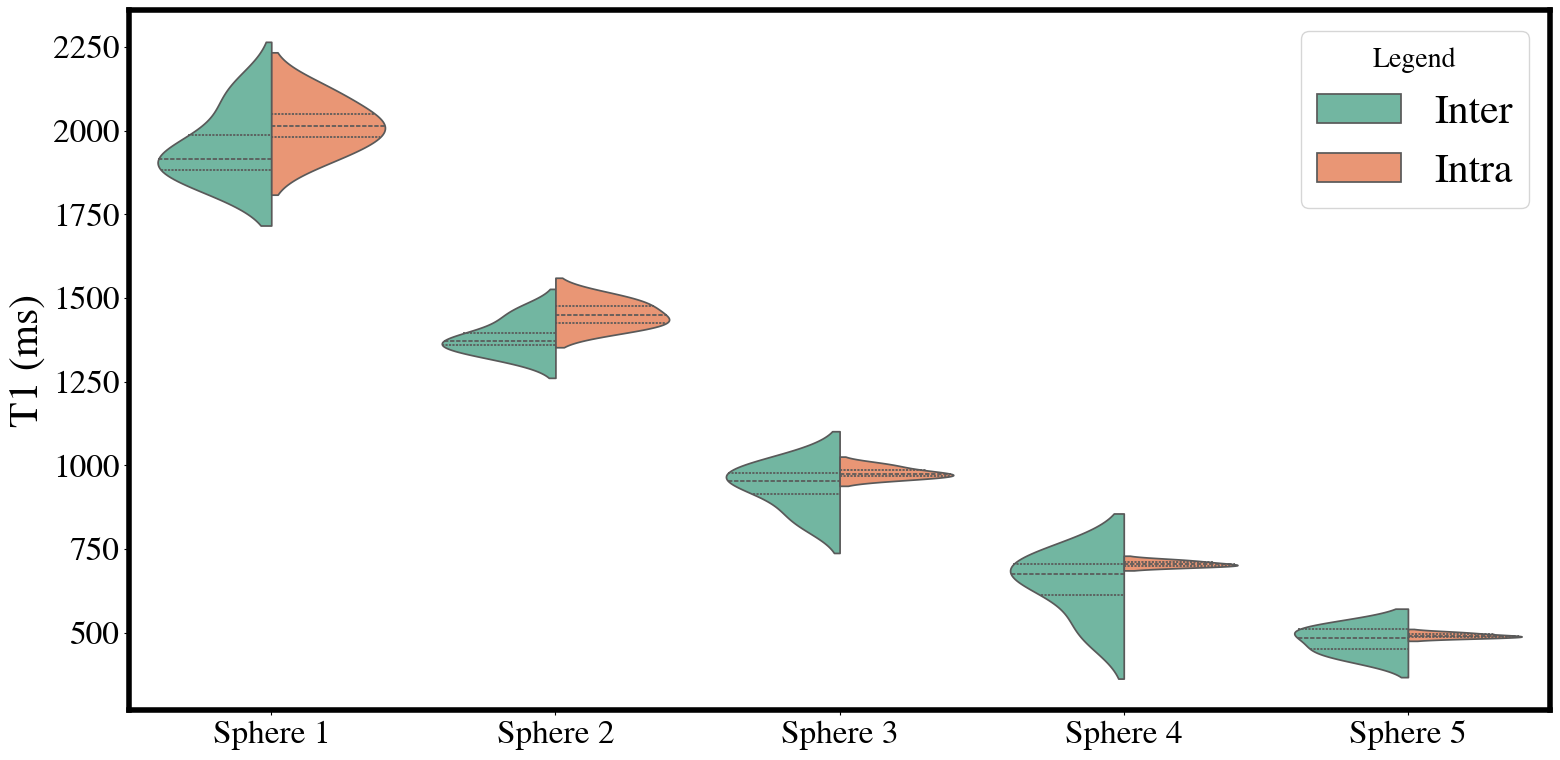

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Identify common lengths for each group
lengths = [len(estimate_1_inter), len(estimate_1_intra),
           len(estimate_2_inter), len(estimate_2_intra),
           len(estimate_3_inter), len(estimate_3_intra),
           len(estimate_4_inter), len(estimate_4_intra),
           len(estimate_5_inter), len(estimate_5_intra)]

# Find the minimum length
min_length = min(lengths)

# Slice arrays to the minimum length
estimate_1_inter = estimate_1_inter[:min_length]
estimate_1_intra = estimate_1_intra[:min_length]

estimate_2_inter = estimate_2_inter[:min_length]
estimate_2_intra = estimate_2_intra[:min_length]

estimate_3_inter = estimate_3_inter[:min_length]
estimate_3_intra = estimate_3_intra[:min_length]

estimate_4_inter = estimate_4_inter[:min_length]
estimate_4_intra = estimate_4_intra[:min_length]

estimate_5_inter = estimate_5_inter[:min_length]
estimate_5_intra = estimate_5_intra[:min_length]

# Combine data into a single DataFrame
df = pd.DataFrame({
    'T1 (ms)': np.concatenate([
        estimate_1_inter, estimate_1_intra,
        estimate_2_inter, estimate_2_intra,
        estimate_3_inter, estimate_3_intra,
        estimate_4_inter, estimate_4_intra,
        estimate_5_inter, estimate_5_intra
    ]),
    'Group': ['Sphere 1'] * min_length * 2 +
             ['Sphere 2'] * min_length * 2 +
             ['Sphere 3'] * min_length * 2 +
             ['Sphere 4'] * min_length * 2 +
             ['Sphere 5'] * min_length * 2,
    'Type': ['Inter'] * min_length + ['Intra'] * min_length +
            ['Inter'] * min_length + ['Intra'] * min_length +
            ['Inter'] * min_length + ['Intra'] * min_length +
            ['Inter'] * min_length + ['Intra'] * min_length +
            ['Inter'] * min_length + ['Intra'] * min_length,
    '': ['Sphere 1'] * min_length * 2 +
                ['Sphere 2'] * min_length * 2 +
                ['Sphere 3'] * min_length * 2 +
                ['Sphere 4'] * min_length * 2 +
                ['Sphere 5'] * min_length * 2,
})

# Set the color palette
sns.set_palette("husl")

# Create a violin plot using seaborn
plt.figure(figsize=(16, 8))
ax = sns.violinplot(x='', y='T1 (ms)', hue='Type', data=df, split=True, inner="quartile", scale="count", palette="Set2")

# Make the legend larger
ax.legend(loc='upper right', title="Legend", prop={'size': 30})

# Show the plot
plt.show()

In [17]:
# Set the color palette
sns.set_palette("Set2")
pal = sns.color_palette()
print(pal.as_hex()[0])
print(pal.as_hex()[1])

#66c2a5
#fc8d62
